In [29]:
import pandas as pd


In [30]:
data=pd.read_csv(r"D:\ml lab data set\car4\Used Car Dataset.csv")

In [31]:
data.head
data['profit']=['profit' if price > 60 else 'loss' for price in data['price(in lakhs)']]
data=data.fillna(0)
data.isnull().sum()
data.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),profit
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,profit
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,loss
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,loss
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,loss
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,loss


In [32]:
data.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1553.000000,1.553000e+03,1.553000e+03,1.553000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.469594,1.469014e+10,1.469014e+10,1.420321e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.490182,2.183526e+11,2.183526e+11,9.654046e+04,3478.855090
min,0.000000,4.000000,620.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.300000,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


MemoryError: Unable to allocate 176. GiB for an array with shape (23644346534,) and data type float64

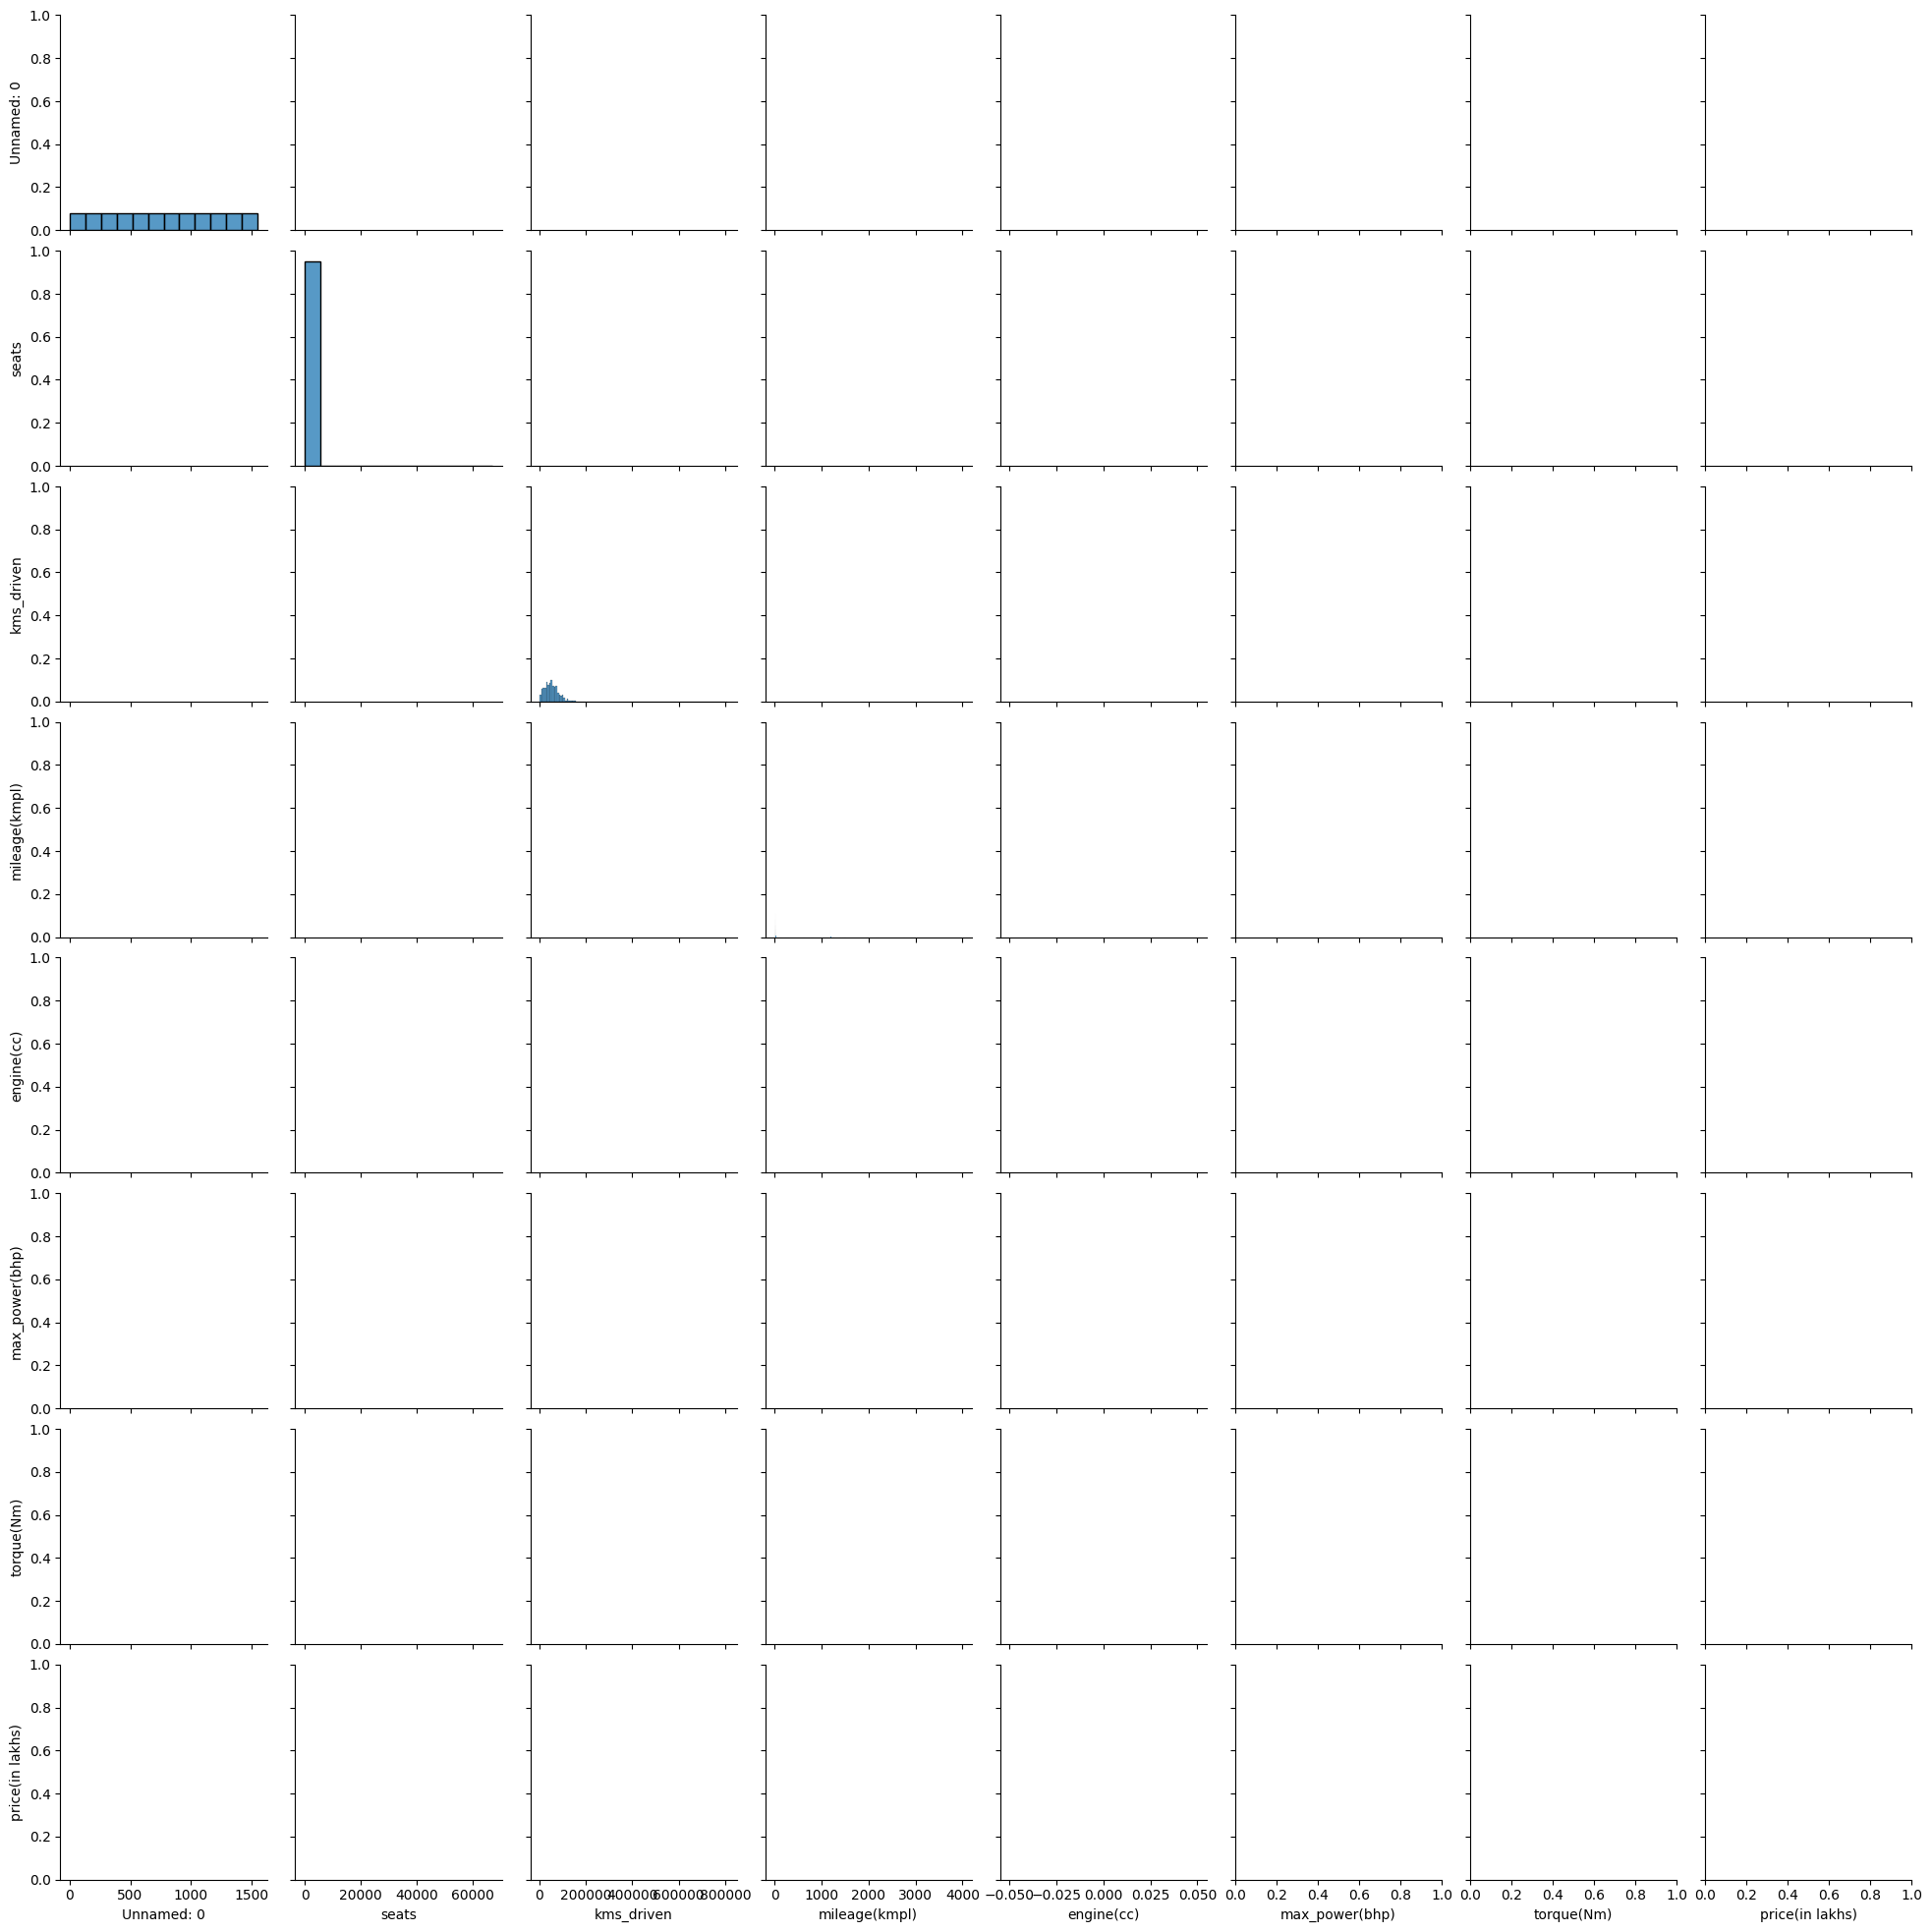

In [35]:
import matplotlib.pyplot as pt
import seaborn as ss
ss.pairplot(data)
data.hist()
pt.tight_layout()

In [14]:
from sklearn.model_selection import train_test_split as tt

In [15]:
x=data.drop(columns=['car_name','registration_year','manufacturing_year','insurance_validity','profit'])
y=data['profit']
y.dtype
x=pd.get_dummies(x)
#y=pd.get_dummies(y)

In [16]:

xtrain,xtest,ytrain,ytest=tt(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier as rf

In [18]:
mod=rf()
xtrain.head()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),fuel_type_5 Seats,fuel_type_CNG,...,transmission_2016,transmission_2017,transmission_2018,transmission_2020,transmission_2021,transmission_2022,transmission_2023,transmission_Automatic,transmission_Manual,transmission_Power Windows Front
1289,1289,5,32997,22.05,796.0,796.0,4733.0,3.39,False,False,...,False,False,False,False,False,False,False,False,True,False
1233,1233,5,32141,1248.00,885.0,885.0,200.0,6.00,False,False,...,False,True,False,False,False,False,False,False,False,False
1208,1208,5,86001,26.00,1498.0,1498.0,986.0,5.75,False,False,...,False,False,False,False,False,False,False,False,True,False
1253,1253,5,92000,18.00,1198.0,1198.0,867.0,3.60,False,False,...,False,False,False,False,False,False,False,False,True,False
382,382,5,42346,20.51,998.0,998.0,6704.0,3.01,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
mod.fit(xtrain,ytrain)
xtest.shape
ytest.shape

(311,)

In [20]:
ypred=mod.predict(xtest)


In [21]:
from sklearn import metrics
print(ytest.shape)
print(ypred.shape)
ytest.head()
ypred[1]

(311,)
(311,)


'loss'

In [22]:
cmm=metrics.confusion_matrix(ytest,ypred)
print(cmm)


[[298   0]
 [  1  12]]


In [23]:
from sklearn.metrics import accuracy_score,  confusion_matrix,classification_report

In [24]:
acc=accuracy_score(ytest,ypred)
clr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)

In [25]:
print(acc,clr,cm)

0.9967845659163987               precision    recall  f1-score   support

        loss       1.00      1.00      1.00       298
      profit       1.00      0.92      0.96        13

    accuracy                           1.00       311
   macro avg       1.00      0.96      0.98       311
weighted avg       1.00      1.00      1.00       311
 [[298   0]
 [  1  12]]


In [26]:
import seaborn as s
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

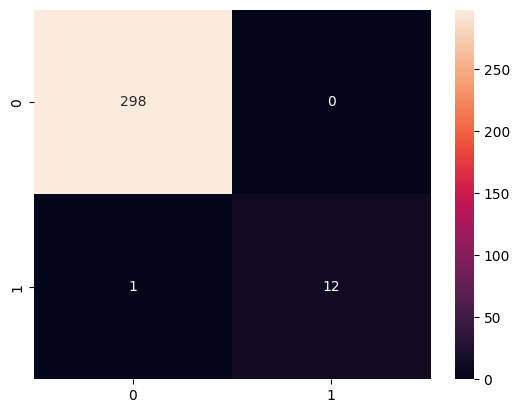

In [28]:
s.heatmap(cm,annot=True,fmt='d')